In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_s_curve, make_swiss_roll, make_blobs
from sklearn.datasets import load_iris, load_wine, load_breast_cancer

In [ ]:
iris = load_iris()
with h5py.File(f"datas/iris.hdf5", "w") as f:
    f.create_dataset("data", data=iris['data'])

wine = load_wine()
with h5py.File(f"data/wine.hdf5", "w") as f:
    f.create_dataset("data", data=wine['data'])

cancer = load_breast_cancer()
with h5py.File(f"data/cancer.hdf5", "w") as f:
    f.create_dataset("data", data=cancer['data'])

In [2]:
# mnist
from sklearn.datasets import fetch_openml

X,_ = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='liac-arff')
X = X.astype(np.float32)
X /= np.sum(X, axis=1, keepdims=True)

with h5py.File(f"data/mnist.hdf5", "w") as f:
    f.create_dataset("data", data=X)

In [3]:
n_samples = [16_000, 64_000, 128_000]
centers = 5
dim = 10

for n in n_samples:
    nX, d = n, dim
    X = make_blobs(nX, d, centers=5, random_state=42)[0].astype(np.float32)
    with h5py.File(f"data/blobs_n={n}_centers={centers}.hdf5", "w") as f:
        f.create_dataset("data", data=X)

In [ ]:
n_samples = 5_000
std = 0.15
alpha = 0.15

X1, y1 = make_moons(n_samples=n_samples, noise=std)
with h5py.File(f"datasets/moons_n={n_samples}_std={std}.hdf5", "w") as f:
    f.create_dataset("data", data=X1)
    f.create_dataset("labels", data=y1)

X2, y2 = make_circles(n_samples=n_samples, factor=0.5, noise=std)
with h5py.File(f"datasets/circles_n={n_samples}_std={std}.hdf5", "w") as f:
    f.create_dataset("data", data=X2)
    f.create_dataset("labels", data=y2)

X3, y3 = make_s_curve(n_samples=n_samples, noise=std)
with h5py.File(f"datasets/curve={n_samples}_std={std}.hdf5", "w") as f:
    f.create_dataset("data", data=X3)
    f.create_dataset("labels", data=y3)

X4, y4 = make_swiss_roll(n_samples=n_samples, noise=std)
with h5py.File(f"datasets/swiss={n_samples}_std={std}.hdf5", "w") as f:
    f.create_dataset("data", data=X4)
    f.create_dataset("labels", data=y4)

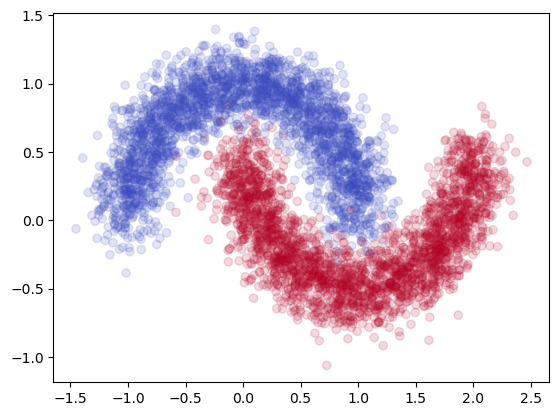

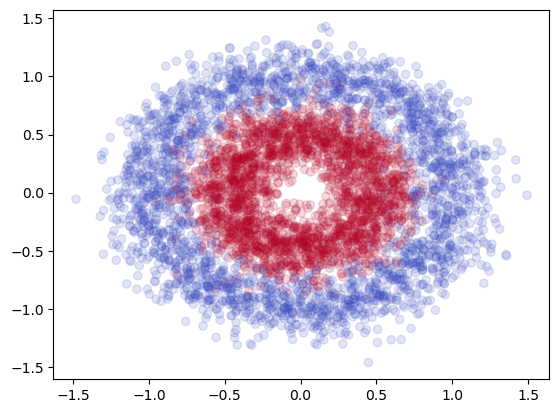

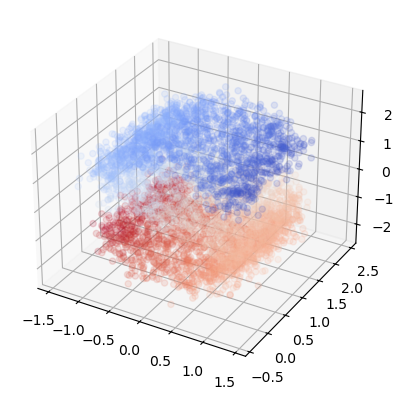

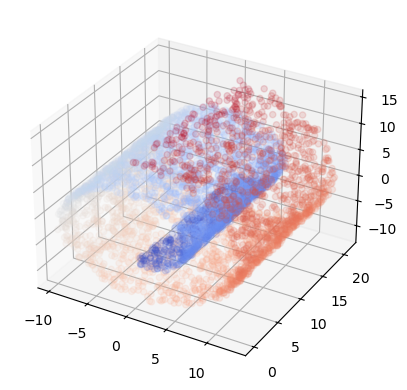

In [3]:
# Plotting the generated datasets

plt.scatter(X1[:, 0], X1[:, 1], alpha=alpha, c=y1, cmap='coolwarm')
plt.show()

plt.scatter(X2[:, 0], X2[:, 1], alpha=alpha, c=y2, cmap='coolwarm')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], alpha=alpha, c=y3, cmap='coolwarm')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X4[:, 0], X4[:, 1], X4[:, 2], alpha=alpha, c=y4, cmap='coolwarm')
plt.show()